# Unit 12 - Tales from the Crypto

---


In [31]:
# Initial imports
import os
import pandas as pd

from dotenv import load_dotenv
from newsapi import NewsApiClient
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer


analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/thomasguyton/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [32]:
# Read your api key environment variable
# YOUR CODE HERE!
news_api= '6fc81322d01a4749af6de8d190b7c75e'
API= news_api

In [33]:
# Create a newsapi client
# YOUR CODE HERE!
newsapi = NewsApiClient (api_key=API)

In [34]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!
btc_articles = newsapi.get_everything(q='bitcoin',
                                      language='en',
                                      sort_by='relevancy')
btc_articles['totalResults']


7010

In [35]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!
eth_articles = newsapi.get_everything(q='ethereum',
                                      language='en',
                                      sort_by='relevancy')
eth_articles['totalResults']



2889

In [39]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!
def get_sentiment_score(article, based_on):
    sentiments = []

    for article in article["articles"]:
        try:
            text = article[based_on]
            date = article["publishedAt"][:10]
            sentiment = analyzer.polarity_scores(text)
            compound = sentiment["compound"]
            pos = sentiment["pos"]
            neu = sentiment["neu"]
            neg = sentiment["neg"]
            sentiments.append({
                "Compound": compound,
                "Negative": neg,
                "Neutral": neu,
                "Positive": pos,
                based_on : text
            })

        except AttributeError:
            pass

    # Create DataFrame
    df = pd.DataFrame(sentiments)
    return df

btc_sentiment_df = get_sentiment_score(btc_articles, 'content')
btc_sentiment_df

,Compound,Negative,Neutral,Positive,content
0,-0.7096,0.169,0.831,0.000,Netflix\r\n is making a docuseries about one o...
1,0.7351,0.000,0.853,0.147,"Even in cyberspace, the Department of Justice ..."
2,-0.3400,0.118,0.825,0.057,The couple would never flee from the country a...
3,0.7783,0.000,0.837,0.163,"If Sundays Super Bowl ads are any indication, ..."
4,0.5859,0.000,0.876,0.124,The news of one of the biggest money launderin...
5,0.6486,0.000,0.854,0.146,The confiscation of the Bitcoin that remained ...
6,-0.1779,0.067,0.887,0.046,Feb 22 (Reuters) - Bitcoin miners are feeling ...
7,0.0000,0.000,1.000,0.000,March 1 (Reuters) - Bitcoin has leapt since Ru...
8,-0.3182,0.091,0.854,0.055,Whose side is cryptocurrency on? If you had as...
9,-0.6808,0.187,0.739,0.074,Getty\r\nWelcome to Nonfungible Tidbits. Our f...


In [41]:
# Create the Ethereum sentiment scores DataFrame
# YOUR CODE HERE!
eth_sentiment_df = get_sentiment_score(eth_articles, 'content')
eth_sentiment_df

,Compound,Negative,Neutral,Positive,content
0,-0.3182,0.093,0.848,0.059,"In February, shit hit the fan in the usual way..."
1,-0.2498,0.059,0.941,0.000,"Technical analysis isnt a perfect tool, but it..."
2,-0.1027,0.036,0.964,0.000,People in Colorado will be able to pay their s...
3,0.6705,0.000,0.812,0.188,Coinbase reported that the share of trading vo...
4,-0.4588,0.083,0.917,0.000,Illustration by James Bareham / The Verge\r\n\...
5,-0.1326,0.044,0.956,0.000,"It seems that in 2022, you cant escape from th..."
6,0.2263,0.000,0.944,0.056,"Last night, Twitter announced itll allow users..."
7,-0.1027,0.105,0.825,0.070,"At over two hours long, the wildly popular new..."
8,0.0000,0.000,1.000,0.000,The cryptocurrency boom over the past few year...
9,0.0000,0.000,1.000,0.000,A version of this article was published in TIM...


In [42]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!
btc_sentiment_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.072065,0.055100,0.872800,0.072150
std,0.491711,0.072253,0.069046,0.054286
min,-0.757900,0.000000,0.739000,0.000000
25%,-0.277550,0.000000,0.829500,0.041000
50%,0.102600,0.000000,0.854000,0.061500
75%,0.564525,0.099250,0.938500,0.117250
max,0.778300,0.211000,1.000000,0.163000


In [43]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!
eth_sentiment_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.138635,0.033850,0.891850,0.074300
std,0.391072,0.042274,0.090052,0.080074
min,-0.526700,0.000000,0.692000,0.000000
25%,-0.110175,0.000000,0.841000,0.000000
50%,0.000000,0.000000,0.904500,0.057500
75%,0.502100,0.065000,0.958000,0.130250
max,0.772200,0.115000,1.000000,0.249000


### Questions:

Q: Which coin had the highest mean positive score?

A: ETH at .074300

Q: Which coin had the highest compound score?

A: BTC at 0.778300

Q. Which coin had the highest positive score?

A: ETH at 0.249000

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [44]:
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/thomasguyton/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/thomasguyton/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [45]:
# Instantiate the lemmatizer
# YOUR CODE HERE!
lemmatizer = WordNetLemmatizer()
# Create a list of stopwords
# YOUR CODE HERE!
stop_words = set(stopwords.words('english'))
# Expand the default stopwords list if necessary
# YOUR CODE HERE!

In [46]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z0-9 ]")
    re_clean = regex.sub('', text)
    
   
    # Create a tokenized list of the words
    words = word_tokenize(re_clean.lower())
    
    # Lemmatize words into root words
    tokens = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    words = [word for word in words if word not in stop_words]
    
    # Remove the stop words
    
    
    return tokens

In [47]:
# Create a new tokens column for Bitcoin
# YOUR CODE HERE
btc_sentiment_df['tokens'] = btc_sentiment_df['content'].apply(tokenizer)
btc_sentiment_df.head()

,Compound,Negative,Neutral,Positive,content,tokens
0,-0.7096,0.169,0.831,0.000,Netflix\r\n is making a docuseries about one o...,"[netflix, is, making, a, docuseries, about, on..."
1,0.7351,0.000,0.853,0.147,"Even in cyberspace, the Department of Justice ...","[even, in, cyberspace, the, department, of, ju..."
2,-0.3400,0.118,0.825,0.057,The couple would never flee from the country a...,"[the, couple, would, never, flee, from, the, c..."
3,0.7783,0.000,0.837,0.163,"If Sundays Super Bowl ads are any indication, ...","[if, sunday, super, bowl, ad, are, any, indica..."
4,0.5859,0.000,0.876,0.124,The news of one of the biggest money launderin...,"[the, news, of, one, of, the, biggest, money, ..."


In [48]:
# Create a new tokens column for Ethereum
# YOUR CODE HERE!
eth_sentiment_df['tokens'] = eth_sentiment_df['content'].apply(tokenizer)
eth_sentiment_df.head()

,Compound,Negative,Neutral,Positive,content,tokens
0,-0.3182,0.093,0.848,0.059,"In February, shit hit the fan in the usual way...","[in, february, shit, hit, the, fan, in, the, u..."
1,-0.2498,0.059,0.941,0.000,"Technical analysis isnt a perfect tool, but it...","[technical, analysis, isnt, a, perfect, tool, ..."
2,-0.1027,0.036,0.964,0.000,People in Colorado will be able to pay their s...,"[people, in, colorado, will, be, able, to, pay..."
3,0.6705,0.000,0.812,0.188,Coinbase reported that the share of trading vo...,"[coinbase, reported, that, the, share, of, tra..."
4,-0.4588,0.083,0.917,0.000,Illustration by James Bareham / The Verge\r\n\...,"[illustration, by, james, bareham, the, verge,..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [49]:
from collections import Counter
from nltk import ngrams

In [50]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!
def get_tokens(df):
    tokens = []
    for token in df['tokens']:
        tokens.extend(token)
    return tokens


btc_tokens = get_tokens(btc_sentiment_df)
eth_tokens = get_tokens(eth_sentiment_df)

In [51]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
def bigram_counter(tokens, N=2): 
    words_count = dict(Counter(ngrams(tokens, n=N)))
    return words_count

In [52]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [53]:
# Use token_count to get the top 10 words for Bitcoin
# YOUR CODE HERE
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [54]:
# Use token_count to get the top 10 words for Ethereum
# YOUR CODE HERE!
top_10_token_btc = token_count(btc_tokens)
top_10_token_btc

[('the', 40),
 ('a', 22),
 ('in', 22),
 ('char', 20),
 ('to', 19),
 ('of', 16),
 ('and', 16),
 ('bitcoin', 12),
 ('reuters', 7),
 ('for', 7)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [55]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

Text(0.5, 1.0, 'Bitcoin Word Cloud')

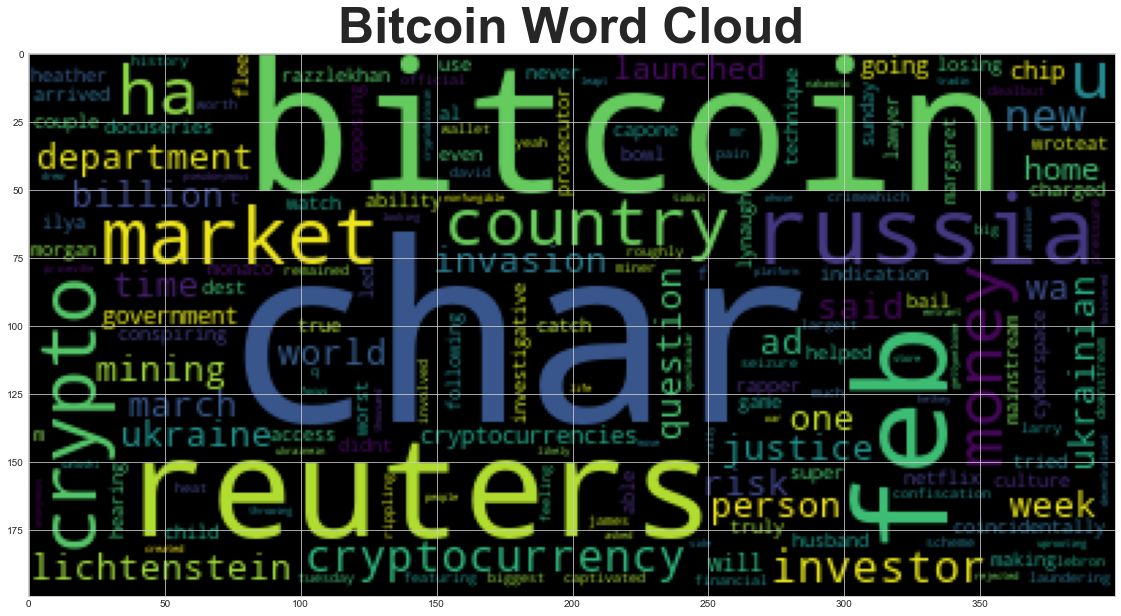

In [56]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!
wc = WordCloud(collocations=False).generate(' '.join(btc_tokens))
plt.imshow(wc)
plt.title(label='Bitcoin Word Cloud', fontdict={'fontsize': 50, 'fontweight':'bold'})

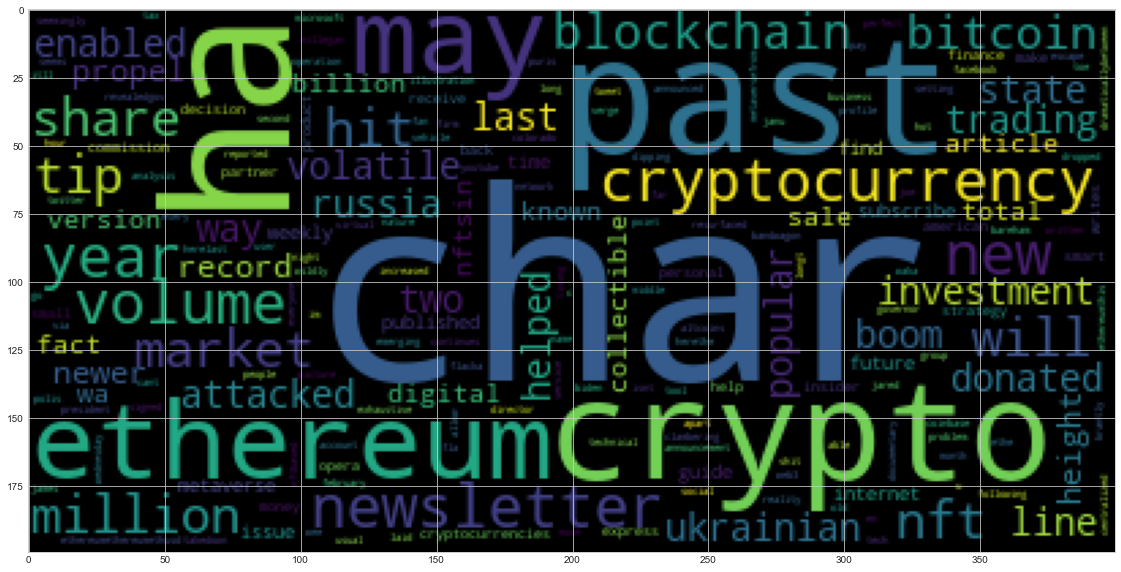

In [57]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!
wc_eth = WordCloud().generate(' '.join(eth_tokens))
plt.imshow(wc_eth)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [58]:
import spacy
from spacy import displacy

In [59]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [60]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [65]:
# Concatenate all of the Bitcoin text together
# YOUR CODE HERE!
btc_content = ' '.join(btc_sentiment_df['content'])

In [67]:
# Run the NER processor on all of the text
doc= nlp(btc_content)

# Add a title to the document
doc.user_data["title"] = "BTC NER"

In [68]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(doc, style='ent')

In [69]:
# List all Entities
# YOUR CODE HERE!
for ent in doc.ents:
    print('{} {}'.format(ent.text, ent.label_))

Netflix ORG
about one CARDINAL
Ilya Lichtenstein PERSON
this week DATE
the Department of Justice ORG
Monaco PERSON
Al Capone LOC
Margaret Lynaugh PERSON
Sundays Super Bowl EVENT
Larry David PERSON
LeBron James PERSON
+3454 ORG
one CARDINAL
Tuesday DATE
$4.5 billion MONEY
Lichtensteins PERSON
Feb. 1 DATE
roughly $3.6 billion MONEY
Feb 22 DATE
Reuters ORG
2021 DATE
thousands CARDINAL
March 1 DATE
Reuters ORG
Russia GPE
Ukraine GPE
Satoshi Nakamoto PERSON
2008 DATE
Getty
Welcome to ORG
Nonfungible Tidbits PERSON
this week DATE
Russia GPE
Ukraine GPE
Ukrainians NORP
Russian NORP
YouTube ORG
Alex Castro PERSON
Verge ORG
BitConnect ORG
Nurphoto/Getty ORG
Russia GPE
last Thursday DATE
Ukranian NORP
Mexico City GPE
Telegr ORG
Feb 15 DATE
Reuters ORG
Europe LOC
two CARDINAL
Russia GPE
LONDON GPE
March 4 DATE
Reuters ORG
Russia GPE
Ukraine GPE
Russia GPE
NEW YORK GPE
Feb 11 DATE
Reuters ORG
Federal Reserve ORG
Feb 11 DATE
Reuters ORG
Intel Corp ORG
Friday DATE
Reuters ORG
BITCOIN PERSON
Ukrainia

---

### Ethereum NER

In [70]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE
eth_content = ' '.join(eth_sentiment_df['content'])

In [71]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
doc= nlp(eth_content)

# Add a title to the document
doc.user_data["title"] = "ETH NER"

In [72]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(doc, style='ent')

In [73]:
# List all Entities
# YOUR CODE HERE!
for ent in doc.ents:
    print('{} {}'.format(ent.text, ent.label_))

February DATE
Ethereum Name Service ORG
ENS ORG
May 201 DATE
Ethereum ORG
ETH-USD ORG
Crypto PERSON
Colorado GPE
the middle of this year DATE
US GPE
Jared Polis PERSON
Coinbase PERSON
last year DATE
Between 2020 and 2021 DATE
James Bareham PERSON
More than $15 million MONEY
More than $15 million MONEY
Ukrainian GPE
Russia GPE
2022 DATE
Facebook ORG
Microsoft ORG
Last night TIME
Twitter PRODUCT
Ethereum ORG
second ORDINAL
two months DATE
NFT ORG
over two hours TIME
YouTube ORG
Waka Flacka Fla ORG
the past few years DATE
NFT ORG
$23 billion MONEY
TIME ORG
weekly DATE
TIME ORG
weekly DATE
Joe Biden PERSON
Wednesday DATE
first ORDINAL
Bitcoin PERSON
Brett Harrison PERSON
Bitcoin PERSON
the past few years DATE
NFT ORG
$23 billion MONEY
Ethereum ORG
American Express ORG
Russia GPE
Ukraine GPE
Opera ORG
Keshas PERSON
Opera ORG
Monday DATE
American Express ORG
more than $4 million MONEY
Russia GPE
Elliptic LOC


---